In [1]:
import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import sympy as sp
from scipy.interpolate import RegularGridInterpolator

x, y = sp.symbols('x,y')
ue = x*(1-x)*y*(1-y)*sp.exp(sp.cos(4*sp.pi*x)*sp.sin(2*sp.pi*y))
f = ue.diff(x, 2) + ue.diff(y, 2)

In [2]:
#copied fom lecture 6
def D2(N):
    D = sparse.diags([1, -2, 1], [-1, 0, 1], (N+1, N+1), 'lil')
    D[0, :4] = 2, -5, 4, -1
    D[-1, -4:] = -1, 4, -5, 2
    return D
def laplace(dx, dy, N):
    D2x = (1./dx**2)*D2(N)
    D2y = (1./dy**2)*D2(N)
    return (sparse.kron(D2x, sparse.eye(N+1)) + 
            sparse.kron(sparse.eye(N+1), D2y))
def mesh2D(N,L):
    x = np.linspace(0, L, N+1)
    y = np.linspace(0, L, N+1)
    return np.meshgrid(x, y, indexing='ij')
N = 10
L = 1
xij, yij = mesh2D(N,L)
F = sp.lambdify((x, y), f)(xij, yij)
A = laplace(L/N,L/N, N)
B = np.ones((N+1, N+1), dtype=bool)
B[1:-1, 1:-1] = 0
bnds = np.where(B.ravel() == 1)[0]
A = A.tolil()
for i in bnds:
    A[i] = 0
    A[i, i] = 1
A = A.tocsr()
b = F.ravel()
b[bnds] = 0
U = sparse.linalg.spsolve(A, b)
U = np.reshape(U, (N+1, N+1))
U.shape

(11, 11)

In [3]:
def basic_eval(x_coord, y_coord):
    x_indices = np.round(np.linspace(0, L, N+1), 1)
    y_indices = np.round(np.linspace(0, L, N+1), 1)
    x_index = np.where(x_indices == x_coord)[0][0]
    y_index = np.where(y_indices == y_coord)[0][0]
    #print(x_index, y_index)
    return U[x_index,y_index]

In [4]:
def interp_eval(x_arg, y_arg):
    x_indices = np.round(np.linspace(0, L, N+1), 1)
    y_indices = np.round(np.linspace(0, L, N+1), 1)
    interpolator = RegularGridInterpolator((x_indices, y_indices), U, method='linear', bounds_error=False, fill_value=None)
    interpolated_value = interpolator((x_arg, y_arg))
    return interpolated_value

(0.04632416515207625, 0.02159829491768344)

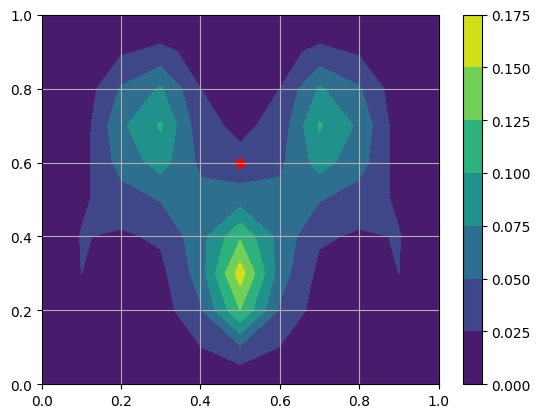

In [5]:
#this is a great way to test
test_x = 0.5
test_y=0.6
plt.contourf(xij, yij, U);
plt.colorbar()
plt.scatter(test_x, test_y, color='red', label='Point')
plt.grid()
basic_eval(test_x, test_y), interp_eval(test_x, test_y) 
basic_eval(0.4, 0.2), basic_eval(0.2, 0.4)

1:  0.025013417178668756 0.025013417178668756
2:  0.016001715722146145 0.016001715722146145
3:  0.008000857861073081
4:  0.0 0.0
compare:  0.008000857861073072 0.008000857861073081


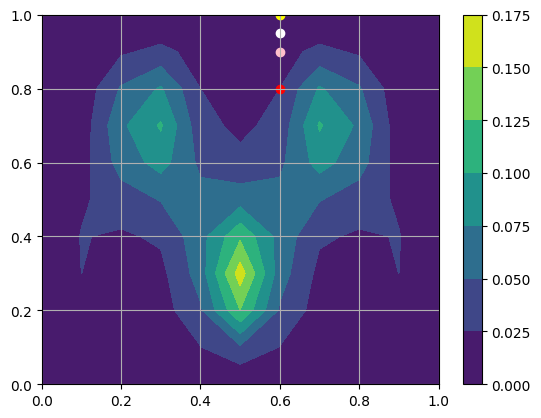

In [6]:
#this is a great way to test
test_x = 0.6
test_y=0.8
test_y2 = 0.9
test_y3 = 0.95 
test_y4 = 1
plt.contourf(xij, yij, U);
plt.colorbar()
plt.scatter(test_x, test_y, color='red')
plt.scatter(test_x, test_y2, color='pink')
plt.scatter(test_x, test_y3, color='white')
plt.scatter(test_x, test_y4, color='yellow')
plt.grid()
print("1: ", basic_eval(test_x, test_y), interp_eval(test_x, test_y))
print("2: ", basic_eval(test_x, test_y2), interp_eval(test_x, test_y2))
#basic_eval is not able to interpolate so it will crash
#print("3: ", basic_eval(test_x, test_y3), interp_eval(test_x, test_y3))

print("3: ", interp_eval(test_x, test_y3))
print("4: ", basic_eval(test_x, test_y4), interp_eval(test_x, test_y4))
check = interp_eval(test_x, test_y4) + interp_eval(test_x, test_y2) / 2
print("compare: ", check, interp_eval(test_x, test_y3))

#basic_eval(0.4, 0.2), basic_eval(0.2, 0.4)